1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [20]:
import numpy as np
import numpy.random as npr
from scipy import linalg as la
from matplotlib import pyplot as plt

# Setting the number of entries N, mean and std for each features
N=1000
mu1 = 0
sigma1 = 1
mu2 = 0
sigma2 = 3

# Generating the three datasets
x1 = npr.normal(mu1,sigma1,size=N)
x2 = x1 + npr.normal(mu2,sigma2,size=N)
x3 = 2 * x1 + x2 

# Stacking together (columns) the variables in a matrix X
X = np.stack([x1,x2,x3])

#Computing covariant matrix and find eigenvalues/eigenvectors using 
#covariance matrix
np_cov = np.cov(X) 
l, V = la.eig(np_cov)
l = np.real_if_close(l)
l = -np.sort(-l)
V[:, [2, 1]] = V[:, [1, 2]]


# Compute eigenvalues/eigenvectors using SVD
U, S, Vt = np.linalg.svd(X)
# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2 / (N-1)
# The matrix U already contains the eigenvectors
V_svd = U


# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

print('\n')

# Compare Eigenvectors
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

#the two procedures yield to the same results

print('\n')
#
for i in range(3):
    print("percentage of variability explained by component %i: %f" % (i, l_svd[i]*100/l_svd.sum()) + ' %')

#See the loss (%) in variability in eliminating the last eigenvector
print("\nLast eigenvalue: ", l_svd[2])
print("variability loss: ", l_svd[2].sum()*100/l_svd.sum())

#print(V, '\n', U)

#Retain only the first and the second components, since the loss of 
#variability is not significant: this makes sense since the third feature is just a
#linear combination of the first two
#define new matrix:

NX = np.delete(X, 2, 0)

# then plot the rotated dataset and its "axes"
#plt.figure(figsize=(8, 8))
#plt.scatter(NX[0,:], NX[1,:], alpha=0.2)


Eigendecomposition:
 [ 2.79549195e+01  1.97241931e+00 -6.28482724e-17]
SVD:
 [2.79666347e+01 1.97321164e+00 6.25708971e-30]


Eigendecomposition:
 [[-0.1122877   0.56632571 -0.81649658]
 [-0.5813168  -0.7038495  -0.40824829]
 [-0.80589221  0.42880191  0.40824829]]
SVD:
 [[-0.1123541   0.56631254 -0.81649658]
 [-0.58123428 -0.70391764 -0.40824829]
 [-0.80594247  0.42870743  0.40824829]]


percentage of variability explained by component 0: 93.409413 %
percentage of variability explained by component 1: 6.590587 %
percentage of variability explained by component 2: 0.000000 %

Last eigenvalue:  6.257089705339732e-30
variability loss:  2.0898870468040427e-29


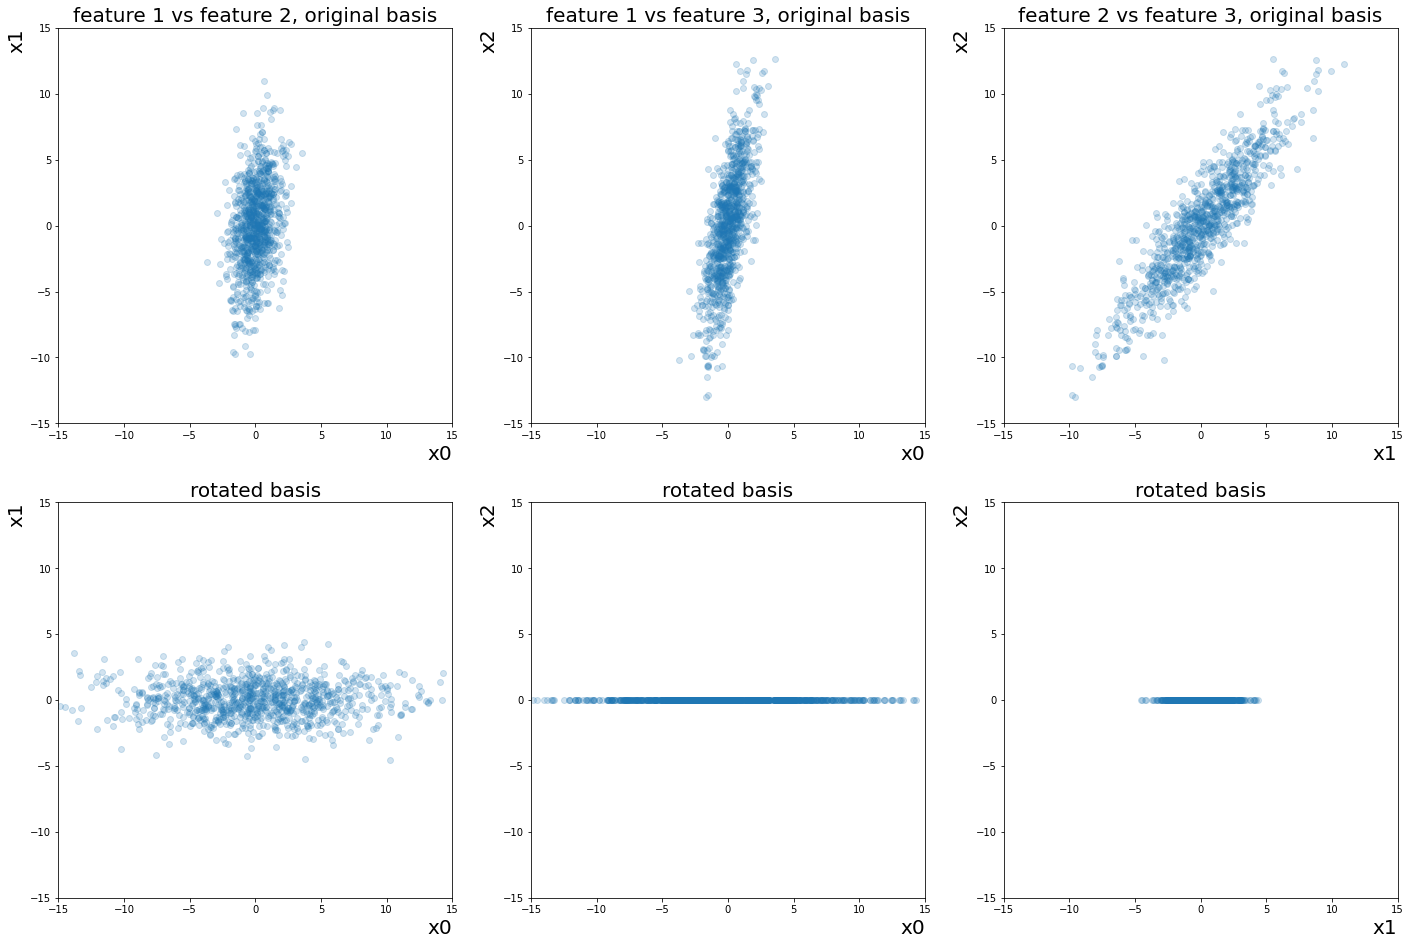

In [37]:
# rotate the dataset accordingly to the new base
Xp = np.dot(V_svd.T, X)

# then plot the rotated dataset and its "axes"
fig, axes = plt.subplots(2,3,figsize=(24, 16))

for i in range(3):
    for j in range(i+1,3):
        axes[0, i+j-1].scatter(X[i,:], X[j,:], alpha=0.2)
        axes[0, i+j-1].axis([-15, 15, -15, 15])
        axes[0, i+j-1].set_title("feature %i vs feature %i, original basis" 
                                 % (i+1, j+1), fontsize = 20)
        axes[0, i+j-1].set_xlabel('x%i' % i, fontsize = 20, loc = "right")
        axes[0, i+j-1].set_ylabel('x%i' % j, fontsize = 20, loc = "top")
        
        axes[1, i+j-1].scatter(Xp[i,:], Xp[j,:], alpha=0.2)
        axes[1, i+j-1].axis([-15, 15, -15, 15])
        axes[1, i+j-1].set_title("rotated basis", fontsize = 20)
        axes[1, i+j-1].set_xlabel('x%i' % i, fontsize = 20, loc = "right")
        axes[1, i+j-1].set_ylabel('x%i' % j, fontsize = 20, loc = "top")

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [38]:
import pandas as pd
import numpy.random as npr
df = pd.DataFrame(X.T, columns = ['x1','x2','x3'])

#Define the noise matrix
mu = np.zeros(10)
sigma = np.diag(npr.rand(10)/20)
noise = npr.multivariate_normal(mu, sigma, size=N).T

#Stack the new variables with the old dataset
Xn = np.concatenate([X, noise])

# Compute eigenvalues/eigenvectors using SVD
Un, Sn, Vnt = np.linalg.svd(Xn)
# Rescale the SVD spectrum to get the eigenvalues
ln = Sn**2 / (N-1)
# The matrix U already contains the eigenvectors
Vn = Un

# Print Eigenvalues and Eigenvectors
print("Eigendevalues:\n", ln)
#print("Eigenvectors:\n", Vn)

print('\n')

for i in range(13):
    print("percentage of variability explained by x%i: %.2f" % (i, ln[i]*100/ln.sum()) + ' %')

# See the loss (%) in variability in retaining the first two values
#print(ln[2])
print("\nvariability loss in retaining the first two components: %.2f" % ((1 - ln[0:2].sum()/ln.sum())*100) + '%')

Eigendevalues:
 [2.79668173e+01 1.97339369e+00 3.87246878e-02 3.21536389e-02
 3.08411273e-02 2.82775964e-02 1.85219085e-02 1.73457797e-02
 9.39074286e-03 8.01370644e-03 6.26504104e-03 8.21438651e-04
 2.17293072e-31]


percentage of variability explained by x0: 92.82 %
percentage of variability explained by x1: 6.55 %
percentage of variability explained by x2: 0.13 %
percentage of variability explained by x3: 0.11 %
percentage of variability explained by x4: 0.10 %
percentage of variability explained by x5: 0.09 %
percentage of variability explained by x6: 0.06 %
percentage of variability explained by x7: 0.06 %
percentage of variability explained by x8: 0.03 %
percentage of variability explained by x9: 0.03 %
percentage of variability explained by x10: 0.02 %
percentage of variability explained by x11: 0.00 %
percentage of variability explained by x12: 0.00 %

variability loss in retaining the first two components: 0.63%


Text(0, 1, 'x1')

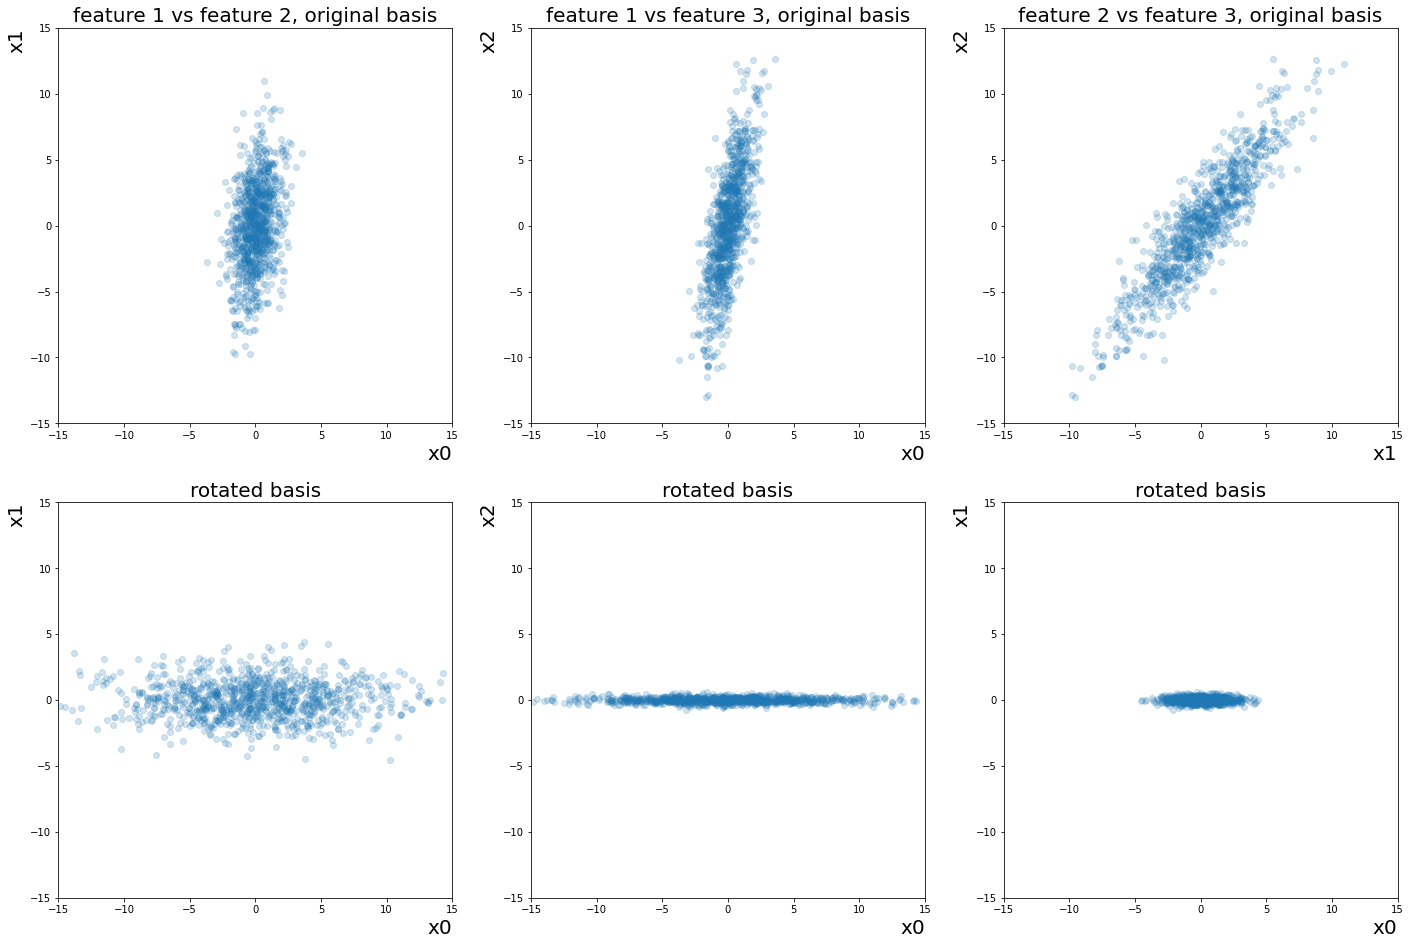

In [43]:
#now the third most significant component is a noise component

# rotate the dataset accordingly to the new base
Xnp = np.dot(Vn.T, Xn)

# then plot the rotated dataset and its "axes"
fig, axes = plt.subplots(2,3,figsize=(24, 16))


# Plot in the original basis
axes[0, 0].scatter(Xn[0,:], Xn[1,:], alpha=0.2)
axes[0, 0].axis([-15, 15, -15, 15])
axes[0, 0].set_title("feature 1 vs feature 2, original basis", fontsize = 20)
axes[0, 0].set_xlabel('x0', fontsize = 20, loc = "right")
axes[0, 0].set_ylabel('x1', fontsize = 20, loc = "top")
axes[0, 1].scatter(Xn[0,:], Xn[2,:], alpha=0.2)
axes[0, 1].axis([-15, 15, -15, 15])
axes[0, 1].set_title("feature 1 vs feature 3, original basis", fontsize = 20)
axes[0, 1].set_xlabel('x0', fontsize = 20, loc = "right")
axes[0, 1].set_ylabel('x2', fontsize = 20, loc = "top")
axes[0, 2].scatter(Xn[1,:], Xn[2,:], alpha=0.2)
axes[0, 2].axis([-15, 15, -15, 15])
axes[0, 2].set_title("feature 2 vs feature 3, original basis", fontsize = 20)
axes[0, 2].set_xlabel('x1', fontsize = 20, loc = "right")
axes[0, 2].set_ylabel('x2', fontsize = 20, loc = "top")


# Plot in the rotated basis
axes[1, 0].scatter(Xnp[0,:], Xnp[1,:], alpha=0.2)
axes[1, 0].axis([-15, 15, -15, 15])
axes[1, 0].set_title("rotated basis", fontsize = 20)
axes[1, 0].set_xlabel('x0', fontsize = 20, loc = "right")
axes[1, 0].set_ylabel('x1', fontsize = 20, loc = "top")
axes[1, 1].scatter(Xnp[0,:], Xnp[2,:], alpha=0.2)
axes[1, 1].axis([-15, 15, -15, 15])
axes[1, 1].set_title("rotated basis", fontsize = 20)
axes[1, 1].set_xlabel('x0', fontsize = 20, loc = "right")
axes[1, 1].set_ylabel('x2', fontsize = 20, loc = "top")
axes[1, 2].scatter(Xnp[1,:], Xnp[2,:], alpha=0.2)
axes[1, 2].axis([-15, 15, -15, 15])
axes[1, 2].set_title("rotated basis", fontsize = 20)
axes[1, 2].set_xlabel('x0', fontsize = 20, loc = "right")
axes[1, 2].set_ylabel('x1', fontsize = 20, loc = "top")

In [ ]:
#After introducing noise, the third most significant component (explaining more variability) in the 
#rotated basis is one of the components of the noise. As in the previous case, only the first two components are retained

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 